# Superstore Problem Solving Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
color = ['#808080','#800000','#808000']

In [3]:
df = pd.read_csv('../input/superstore-dataset-final/Sample - Superstore.csv',encoding = 'windows-1252')

In [4]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [10]:
df['Month'] = df['Ship Date'].dt.month
df['Year'] = df['Ship Date'].dt.year

In [11]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016


# Duration of Delay days Shipping

In [12]:
df['Delay ship days'] = df['Ship Date']  - df['Order Date']

In [13]:
delay = df['Delay ship days'].value_counts().reset_index()

In [14]:
delay = pd.DataFrame(delay)
delay.columns=['days','Delay ship Days']

In [15]:
delay

,days,Delay ship Days
0,4 days,2774
1,5 days,2169
2,2 days,1334
3,6 days,1203
4,3 days,1005
5,7 days,621
6,0 days,519
7,1 days,369


****7 days late shpping 621 times****

# Each year  How much shpping delay?

In [16]:
latedays = df[df['Delay ship days'] == '7 days']

In [17]:
latedays['Year'].value_counts()

2017    210
2016    155
2015    142
2014    104
2018     10
Name: Year, dtype: int64

Text(0.5, 1.0, 'Each year shpping delay distripution')

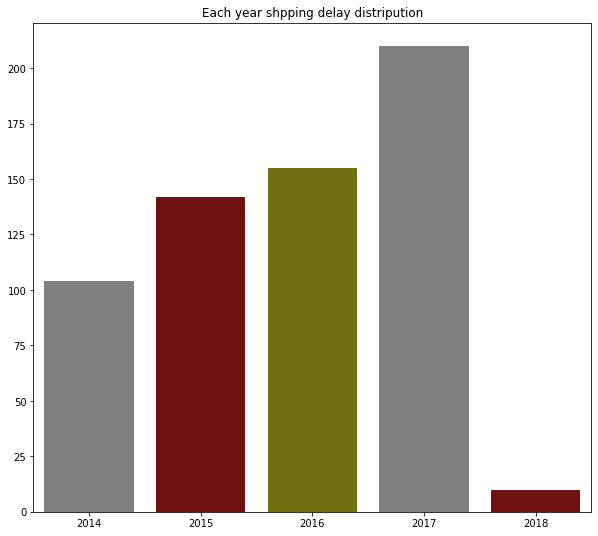

In [18]:
fig = plt.figure(figsize=(10,9))
sns.barplot(x = latedays['Year'].value_counts().index,y = latedays['Year'].value_counts().values,
           palette = color)
plt.title('Each year shpping delay distripution')

****2017 very high delay shpping****

In [19]:
latedays

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Delay ship days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,7 days
16,17,CA-2014-105893,2014-11-11,2014-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,...,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.8800,6,0.00,13.3176,11,2014,7 days
86,87,CA-2017-155558,2017-10-26,2017-11-02,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,Rochester,...,Technology,Accessories,Logitech LS21 Speaker System - PC Multimedia -...,19.9900,1,0.00,6.7966,11,2017,7 days
87,88,CA-2017-155558,2017-10-26,2017-11-02,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,Rochester,...,Office Supplies,Labels,Avery 511,6.1600,2,0.00,2.9568,11,2017,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,9802,CA-2017-137918,2017-09-29,2017-10-06,Standard Class,JK-15730,Joe Kamberova,Consumer,United States,Lodi,...,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,97.3000,7,0.00,28.2170,10,2017,7 days
9827,9828,CA-2017-169999,2017-06-19,2017-06-26,Standard Class,JS-15685,Jim Sink,Corporate,United States,New York City,...,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,129.3000,2,0.00,6.4650,6,2017,7 days
9828,9829,CA-2017-169999,2017-06-19,2017-06-26,Standard Class,JS-15685,Jim Sink,Corporate,United States,New York City,...,Office Supplies,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,11.5680,3,0.20,3.7596,6,2017,7 days
9829,9830,US-2017-152842,2017-07-16,2017-07-23,Standard Class,NF-18385,Natalie Fritzler,Consumer,United States,Charlotte,...,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",242.3520,3,0.20,15.1470,7,2017,7 days


# #each  Month Shpping Delay

In [20]:
latedays['Month'].value_counts()

12    85
8     77
11    75
9     66
10    50
4     46
1     44
6     44
7     40
2     39
5     33
3     22
Name: Month, dtype: int64

Text(0.5, 1.0, 'Each month delay shpping distripution')

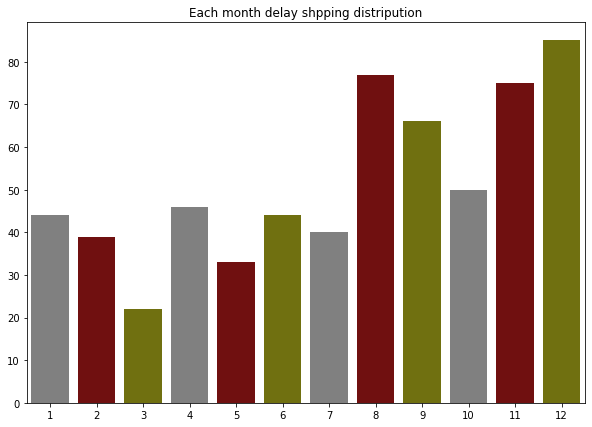

In [21]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x = latedays['Month'].value_counts().index,y=latedays['Month'].value_counts().values,palette = color)
plt.title('Each month delay shpping distripution')

****12,11,8 month high delay shpping****

# How much Total sales

In [22]:
df['Sales'].sum()

2297200.8603000003

# How much each yearly sales?

In [23]:
yearlysales = df.groupby(['Year'])['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Each year sales distripution')

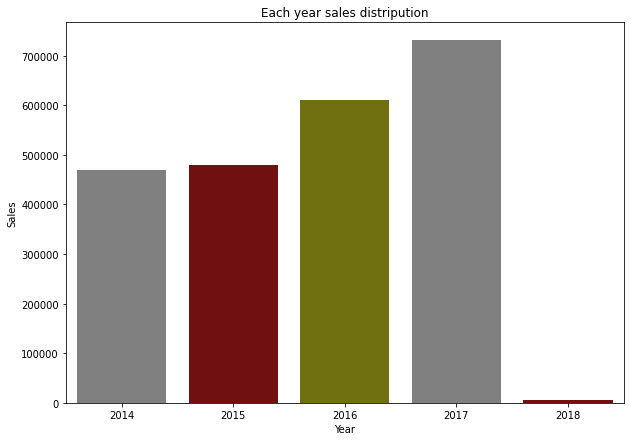

In [24]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x = yearlysales['Year'],y=yearlysales['Sales'],palette = color)
plt.title('Each year sales distripution')

****2017 good sales,and 2018 is very low sales****

# Each Month Sales

In [25]:
monthsales = df.groupby(['Month'])['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Each Month sales distripution')

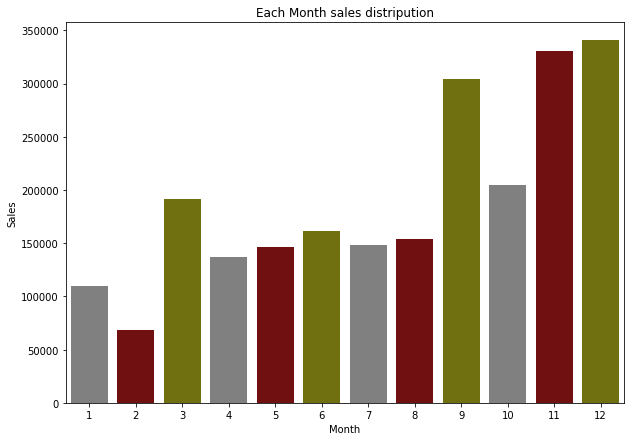

In [26]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x = monthsales['Month'],y=monthsales['Sales'],palette = color)
plt.title('Each Month sales distripution')

****10,11,12 month sales is good,and 2 month sales is low****

# Whitch year more shiping?

In [27]:
yearlyquant = df.groupby(['Year'])['Quantity'].sum().reset_index()

Text(0.5, 1.0, 'Each year shipping distripution')

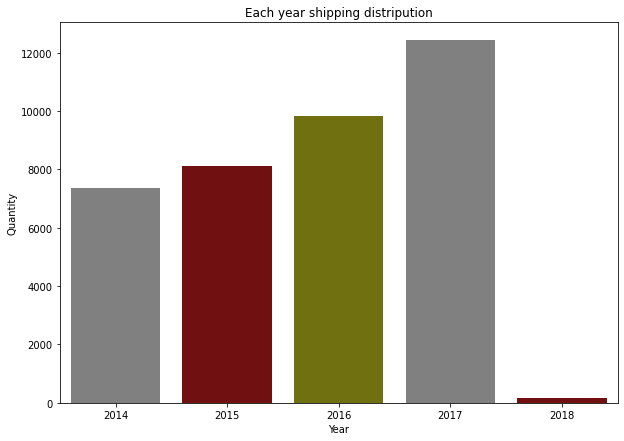

In [28]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x = yearlyquant['Year'],y=yearlyquant['Quantity'],palette = color)
plt.title('Each year shipping distripution')

**2017 more shipping and 2018 very low**

# Which State more sales?

In [29]:
statessales = df.groupby(['State'])['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Each State sales distripution')

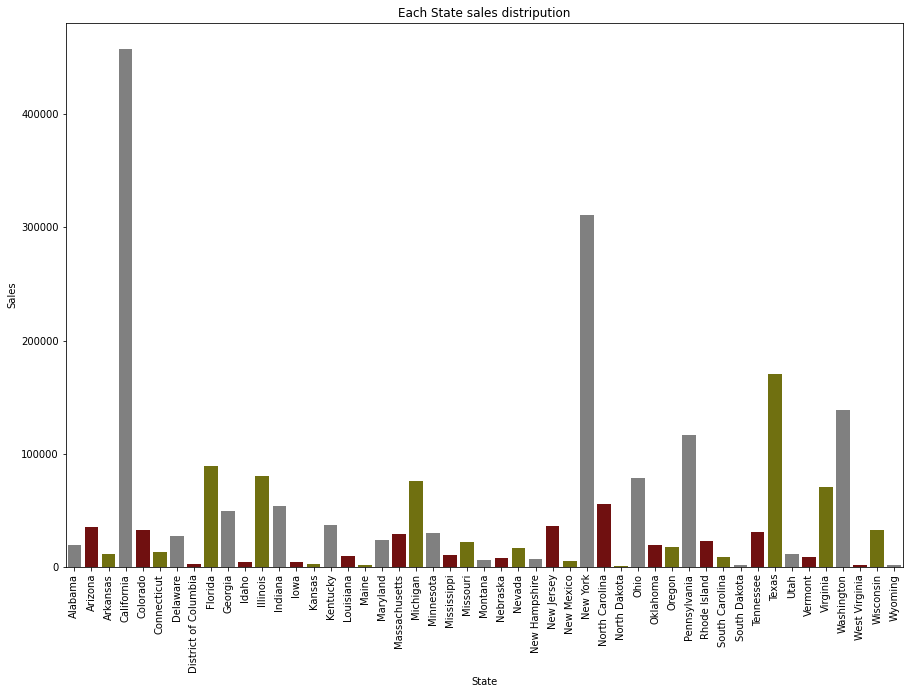

In [30]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x = statessales['State'],y=statessales['Sales'],palette = color)
plt.tick_params(axis ='x',rotation = 90)
plt.title('Each State sales distripution')

****Califomia and new yeark is more sales****

# Each States shipping delay

In [31]:
latedays['State'].value_counts()

California        127
New York           67
Washington         59
Texas              47
Arizona            31
Florida            30
Illinois           28
Pennsylvania       25
Ohio               22
Tennessee          16
North Carolina     16
Michigan           16
New Jersey         13
Minnesota          12
Georgia            11
Kentucky            9
Indiana             9
Massachusetts       8
Arkansas            8
Colorado            7
Nevada              7
Rhode Island        6
Oklahoma            6
Virginia            6
Alabama             6
Kansas              4
Oregon              3
Maryland            3
Delaware            3
Montana             3
Connecticut         3
Iowa                2
Mississippi         2
Wisconsin           2
Nebraska            1
New Mexico          1
New Hampshire       1
Missouri            1
Name: State, dtype: int64

Text(0.5, 1.0, 'Each State shipping delay distripution')

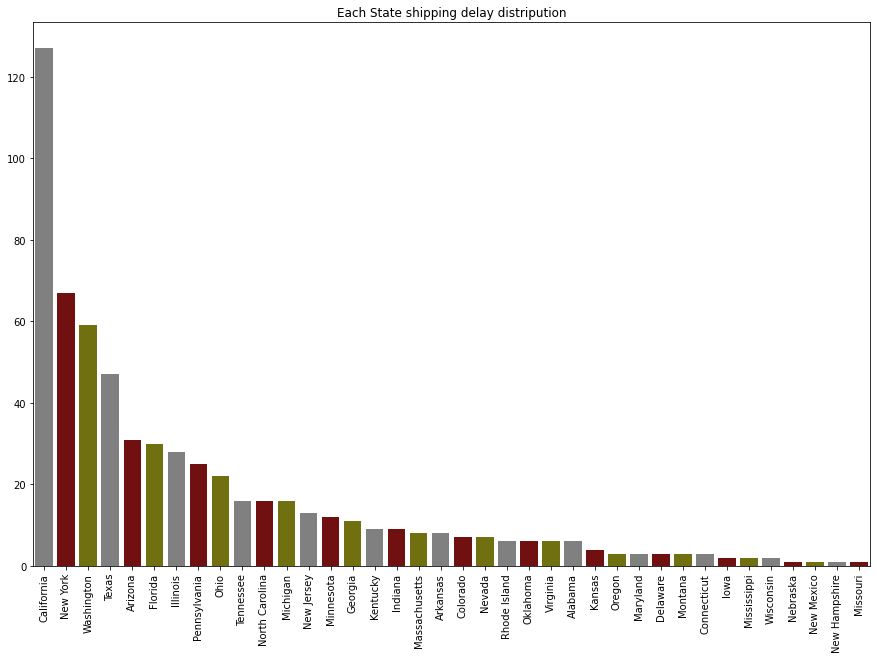

In [32]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x = latedays['State'].value_counts().index,y=latedays['State'].value_counts().values, palette = color)
plt.tick_params(axis ='x',rotation = 90)
plt.title('Each State shipping delay distripution')

****Califormia and newyear shpping delay very high****

# TOP 10  Product Quantity of Shipping

In [33]:
TOPQUNT = df.groupby(df['Product Name'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending  =False).head(10)

Text(0.5, 1.0, 'top 10 product quantity of shipping Distripution')

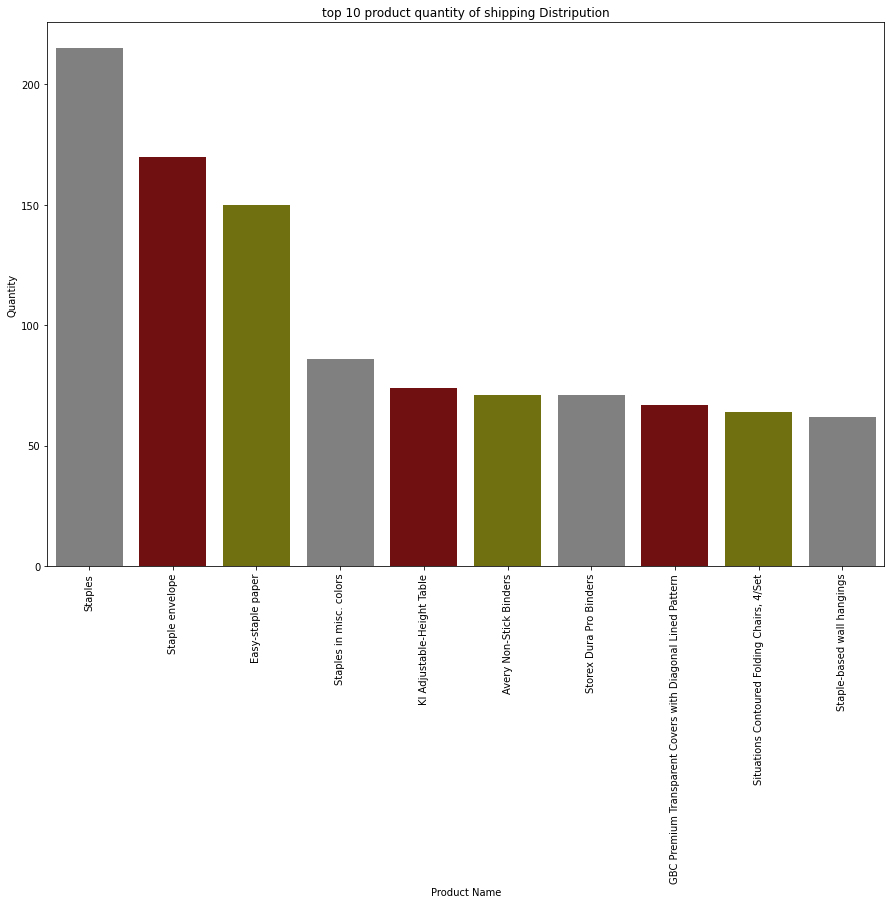

In [34]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x = TOPQUNT['Product Name'],y=TOPQUNT['Quantity'], palette = color)
plt.tick_params(axis ='x',rotation = 90)
plt.title('top 10 product quantity of shipping Distripution')

****Staples very high quantity of shippine****

# #Top 10 product is more Sales

In [35]:
topsales = df.groupby(df['Product Name'])['Sales'].sum().reset_index().sort_values('Sales',ascending  =False).head(10)

Text(0.5, 1.0, 'top 10 product Sales Distripution')

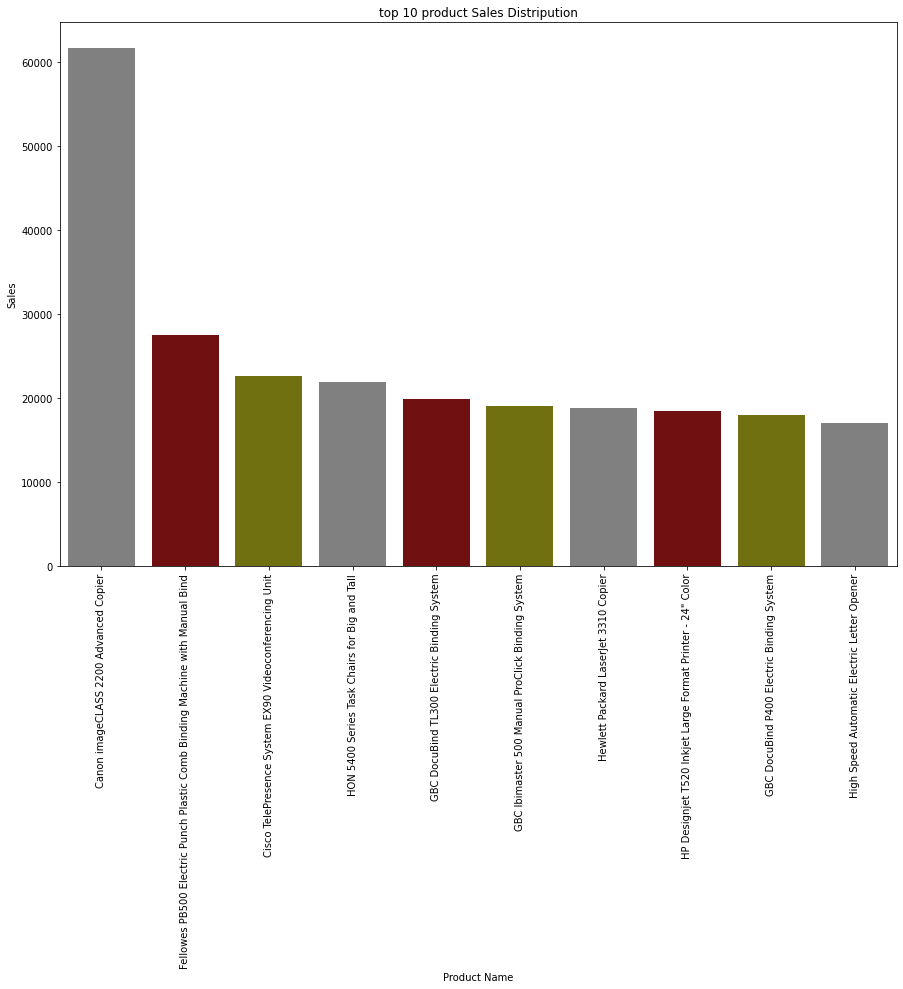

In [36]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x = topsales['Product Name'],y=topsales['Sales'], palette = color)
plt.tick_params(axis ='x',rotation = 90)
plt.title('top 10 product Sales Distripution')

# Each Category of Sales

In [37]:
Categorysales = df.groupby(['Category'])['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Each Category  Sales Distripution')

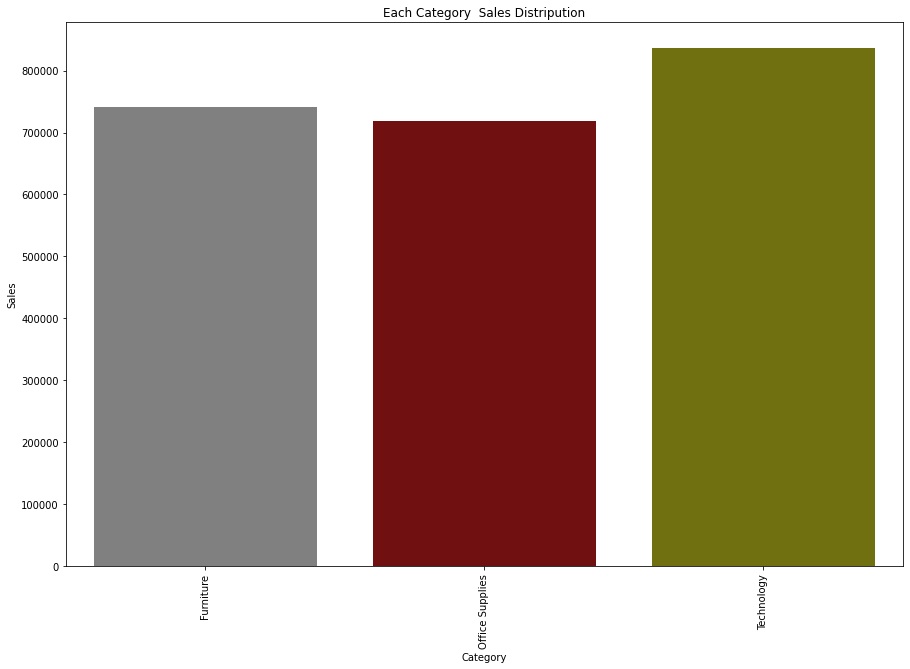

In [38]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x=Categorysales['Category'],y =Categorysales['Sales'],palette = color)
plt.tick_params(axis ='x',rotation = 90)
plt.title('Each Category  Sales Distripution')

**very high seles tech**

# Why 2018 is very low sales?

In [39]:
dis = df.groupby(['Category'])['Discount'].sum().reset_index()
salesy = df.groupby(['Category'])['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Discount Category')

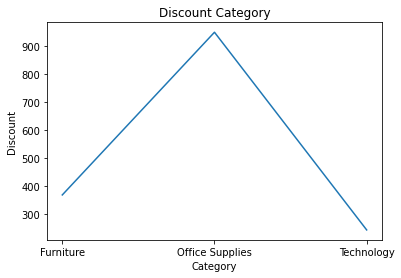

In [40]:
sns.lineplot(x = dis['Category'],y = dis['Discount'])
plt.title('Discount Category')

Text(0.5, 1.0, 'Sales of Category')

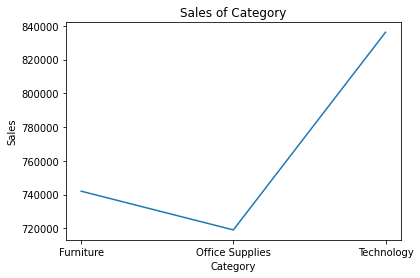

In [41]:
sns.lineplot(x = salesy['Category'],y =salesy['Sales'])
plt.title('Sales of Category')

****More Discount in Office Supplies but your sales is very low,
but very low discount of tech but sales is very good
you inverst technology very sales is very high****

In [42]:
df2018= df[df['Year'] == 2018]

In [43]:
df2018.groupby(['Category'])['Sales'].sum()

Category
Furniture          2864.4068
Office Supplies    1887.1340
Technology          408.1560
Name: Sales, dtype: float64

In [44]:
df2018.groupby(['Category'])['Discount'].sum()

Category
Furniture          2.22
Office Supplies    5.20
Technology         0.20
Name: Discount, dtype: float64

****Your discount of 2018 category of technology very low
that why your sales very low 2018****